In [2]:
import h5py

filename='/fs/scratch/cond0080/y3_catalogs/March16_2020/Y3_mastercat_03_31_20.h5'

f = h5py.File(filename, 'r')

# List all groups
list(f.keys())

['catalog', 'randoms', 'maps', 'regions', 'masks', 'index']

In [2]:
# List all groups
list(f.keys())
dset = f['catalog/']
list(dset.keys())

['metacal', 'gold', 'bpz', 'dnf', 'redmagic', 'redmapper', 'maglim', 'sompz']

In [3]:
# For now, let's consider only 'gold' which contains the photometry
#golddset=dset['gold']
golddset = f['catalog/gold/']
list(golddset.keys())

['a_sed_sfd98_g',
 'a_sed_sfd98_i',
 'a_sed_sfd98_r',
 'a_sed_sfd98_z',
 'coadd_object_id',
 'dec',
 'delta_mag_chrom_g',
 'delta_mag_chrom_i',
 'delta_mag_chrom_r',
 'delta_mag_chrom_z',
 'delta_mag_y4_g',
 'delta_mag_y4_i',
 'delta_mag_y4_r',
 'delta_mag_y4_z',
 'ebv_sfd98',
 'extended_class_mash_sof',
 'flags',
 'flags_badregions',
 'flags_footprint',
 'flags_foreground',
 'flags_gold',
 'flags_phot',
 'hpix_16384',
 'n_images_g',
 'n_images_i',
 'n_images_r',
 'n_images_z',
 'ra',
 'sextractor_flags_g',
 'sextractor_flags_i',
 'sextractor_flags_r',
 'sextractor_flags_z',
 'sof_cm_flux_corrected_g',
 'sof_cm_flux_corrected_i',
 'sof_cm_flux_corrected_r',
 'sof_cm_flux_corrected_z',
 'sof_cm_flux_err_g',
 'sof_cm_flux_err_i',
 'sof_cm_flux_err_r',
 'sof_cm_flux_err_z',
 'sof_cm_mag_corrected_g',
 'sof_cm_mag_corrected_i',
 'sof_cm_mag_corrected_r',
 'sof_cm_mag_corrected_z',
 'sof_cm_mag_err_g',
 'sof_cm_mag_err_i',
 'sof_cm_mag_err_r',
 'sof_cm_mag_err_z',
 'sof_flags',
 'tilename']

In [2]:
ra = f['catalog/gold/ra'][:]
dec = f['catalog/gold/dec'][:]
gmag = f['catalog/gold/sof_cm_mag_corrected_g'][:]
rmag = f['catalog/gold/sof_cm_mag_corrected_r'][:]
imag = f['catalog/gold/sof_cm_mag_corrected_i'][:]
zmag = f['catalog/gold/sof_cm_mag_corrected_z'][:]
flags_foreground = f['catalog/gold/flags_foreground'][:]
flags_badregions = f['catalog/gold/flags_badregions'][:]
flags_gold = f['catalog/gold/flags_gold'][:]
flags_footprint = f['catalog/gold/flags_footprint'][:]

In [3]:
#flags_foreground == 0
#flags_badregions < 2
#flags_gold < 8
#flags_footprint == 1
good = (flags_foreground == 0)&(flags_badregions < 2)&(flags_gold<8)&(flags_footprint == 1)&(gmag>0)&(rmag>0)&(imag>0)&(zmag>0)&(gmag<31)&(rmag<31)&(imag<31)&(zmag<31)

#print(gmag[good].size)
#print(gmag[good].min(), gmag[good].max())
#print(ra[good].min(), ra[good].max())
#print(dec[good].min(), dec[good].max())

good_des=(ra<50)&(-10<dec)&(dec<5)&(good)
print(ra[good_des])
print(ra[good_des].size)
print(dec[good_des])

[45.00144133 44.99725347 44.9971163  ... 44.99832949 45.00159709
 44.99958972]
35549442
[ 0.00370761  0.01044044  0.00944757 ... -0.00374518 -0.00214651
 -0.00241723]


In [8]:
#goodg=gmag[good_des].copy() #new array that has only needed
#goodr=rmag[good_des].copy()
#goodi=imag[good_des].copy() 
#goodz=zmag[good_des].copy()

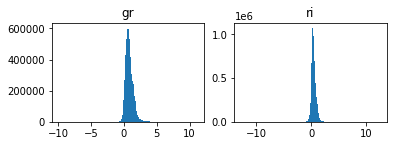

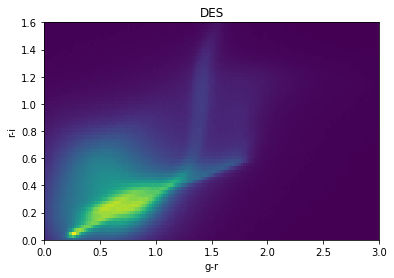

In [4]:
import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm
%matplotlib inline
from matplotlib import colors

plt.subplot(221)
plt.hist(gmag[good_des]-rmag[good_des], 1000)
plt.title('gr')
plt.subplot(222)
plt.hist(rmag[good_des]-imag[good_des], 1000)
plt.title('ri')

plt.figure()
gr = gmag[good_des]-rmag[good_des]
ri = rmag[good_des]-imag[good_des]

plt.hist2d(gr,ri,bins=(1000,1000))
#img = plt.hist2d(gr,ri,bins=(1000,1000))
#plt.colorbar()

plt.xlabel('g-r')
plt.ylabel('r-i')
plt.title('DES')
plt.xlim(0,3.0)
plt.ylim(0,1.6)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

#plt.plot(ra, dec, 'k,')
plt.subplot(221)
plt.hist(gmag[good_des], 1000)
plt.title('g')
plt.subplot(222)
plt.hist(rmag[good_des], 1000)
plt.title('r')
plt.subplot(223)
plt.hist(imag[good_des],1000)
plt.title('i')
plt.subplot(224)
plt.hist(zmag[good_des],1000)
plt.title('z')

plt.figure()
plt.hist(rmag[good_des], 1000)
plt.show()

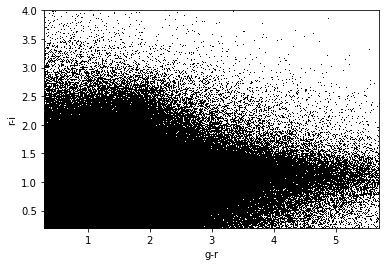

In [18]:
#plt.figure()
#gr = gmag[good]-rmag[good]
#ri = rmag[good]-imag[good]
#plt.plot(gr, ri, 'k,' )
#plt.xlabel('g-r')
#plt.ylabel('r-i')
#plt.xlim(0.3,5.7)
#plt.ylim(0.2,4.0)
#plt.show()

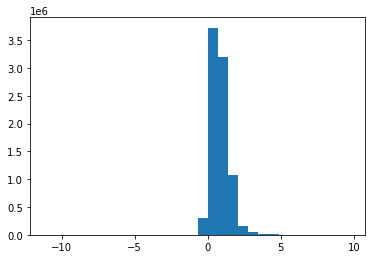

In [6]:
plt.figure()
plt.hist(gr,30)
plt.show()

In [7]:
import astropy.io.fits as fits

fitsfile = '/users/PCON0003/cond0080/cats/DATA_CMASS/galaxy_DR12v5_CMASS_South.fits'
hdu = fits.open(fitsfile)

In [11]:
hdu.info()

Filename: /users/PCON0003/cond0080/cats/DATA_CMASS/galaxy_DR12v5_CMASS_South.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     92   230831R x 42C   [D, D, J, 12A, J, J, J, J, J, J, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, E, 5E, E, 5E, J, E, E, E, E, E, E, E, E, E, J, J, J, J, 3I, J, J, J, J]   


In [13]:
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  362 / width of table in bytes                        
NAXIS2  =               230831 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   42 / number of fields in each row                   
TTYPE1  = 'RA      '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'DEC     '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'RUN     '        

In [8]:
cmass_ra = hdu[1].data['RA']
cmass_dec = hdu[1].data['DEC']
cmass_z = hdu[1].data['Z']
print(cmass_ra.min(), cmass_ra.max())
print(cmass_dec.min(), cmass_dec.max())

9.090665651001473e-05 359.9981667713886
-10.9925876282706 36.2367537699138


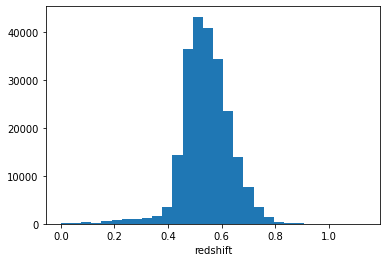

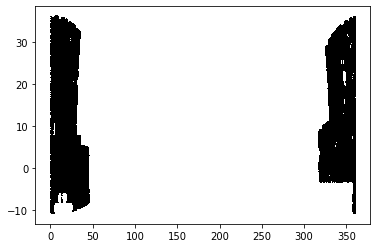

In [9]:
import matplotlib.pyplot as plt
plt.hist(cmass_z,30)
plt.xlabel('redshift')
plt.figure()
plt.plot(cmass_ra, cmass_dec,'k,')
plt.show()

In [12]:
# Matching catalogs
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree)
catalog = SkyCoord(ra=cmass_ra*u.degree, dec=cmass_dec*u.degree)
idx, d2d, d3d = c.match_to_catalog_sky(catalog)
print(idx)

[ 21291  21291  21291 ... 226144 226144 226144]


In [25]:
good_des=(ra<50)&(-10<dec)&(dec<5)&(good)
print(ra[good_des])
print(ra[good_des].size)
print(dec[good_des])

[45.00144133 44.99725347 44.9971163  ... 39.1294789  39.13307359
 39.14297997]
760103
[3.70761157e-03 1.04404433e-02 9.44756779e-03 ... 4.99818060e+00
 4.99924734e+00 4.99760915e+00]


In [ ]:
#goodra=ra[good_des].copy() #new array that has only needed
#gooddec=dec[good_des].copy()

In [1]:
#array converted to fits file:

import os
import numpy as np
from astropy.io import fits
data=matched
hdu=fits.PrimaryHDU(data=data)

hdu.writeto('large.fits')


NameError: name 'f' is not defined